In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('recall_probas.csv')

In [5]:
skill_strategies = ['mu_back', 'theta_thres', 'theta_thres_est',
       'theta_thres_multiskill', 'theta_thres_multiskill_est',
       'random_review', 'no_review']
best_value = {}
evolution_proba_retention = {} #dict with the list of the mean probabity to win a question about the kc of each week for the best param for each strategy during retention
evolution_proba_learning = {} #dict with the list of the mean probabity to win a question about the kc of each week for the best param for each strategy during learning

In [6]:
for strategy in skill_strategies:
    a = df[(df.skill_strategy == strategy) & (df.period == 'retention')].drop('run_id', axis = 1).groupby('param').mean().mean(axis = 1)
    best_value[strategy] = a.idxmax()
    evolution_proba_retention[strategy] = df[(df.skill_strategy == strategy) & (df.period == 'retention') & (df.param == best_value[strategy])].drop(['run_id', 'param'], axis = 1).mean().values
    evolution_proba_learning[strategy] = df[(df.skill_strategy == strategy) & (df.period == 'learning') & (df.param == best_value[strategy])].drop(['run_id', 'param'], axis = 1).mean().values

In [7]:
best_value

{'mu_back': 1.0,
 'theta_thres': 0.4,
 'theta_thres_est': 0.4,
 'theta_thres_multiskill': 0.4,
 'theta_thres_multiskill_est': 0.5,
 'random_review': 0.0,
 'no_review': 0.0}

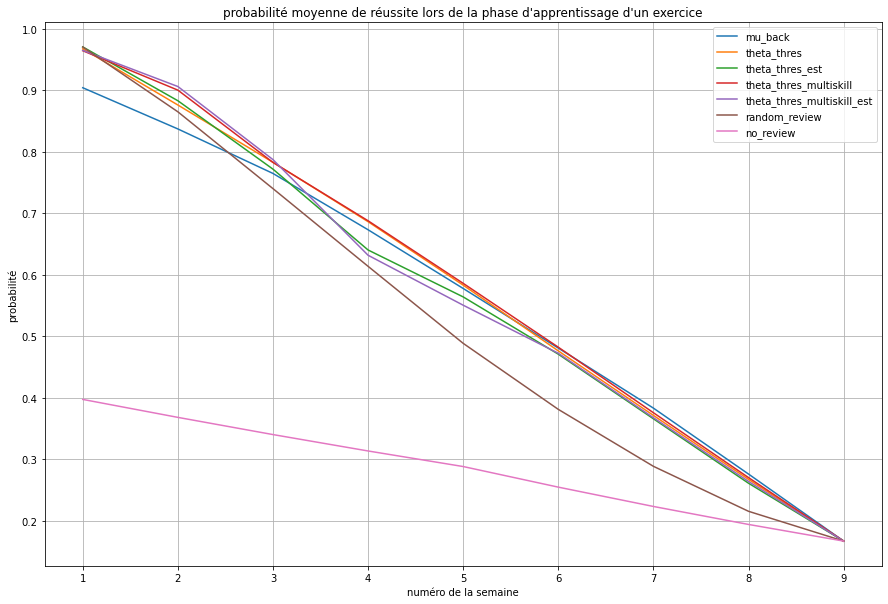

In [8]:
x = [i+1 for i in range(len(df.iloc[0:1, 5:].values[0]))]
plt.figure(figsize=(15, 10)) 
for strategy in skill_strategies:
    plt.plot(x, evolution_proba_learning[strategy], label = strategy)
plt.xlabel("numéro de la semaine")
plt.ylabel("probabilité")
plt.legend()
plt.title("probabilité moyenne de réussite lors de la phase d'apprentissage d'un exercice")
plt.grid()
plt.show()

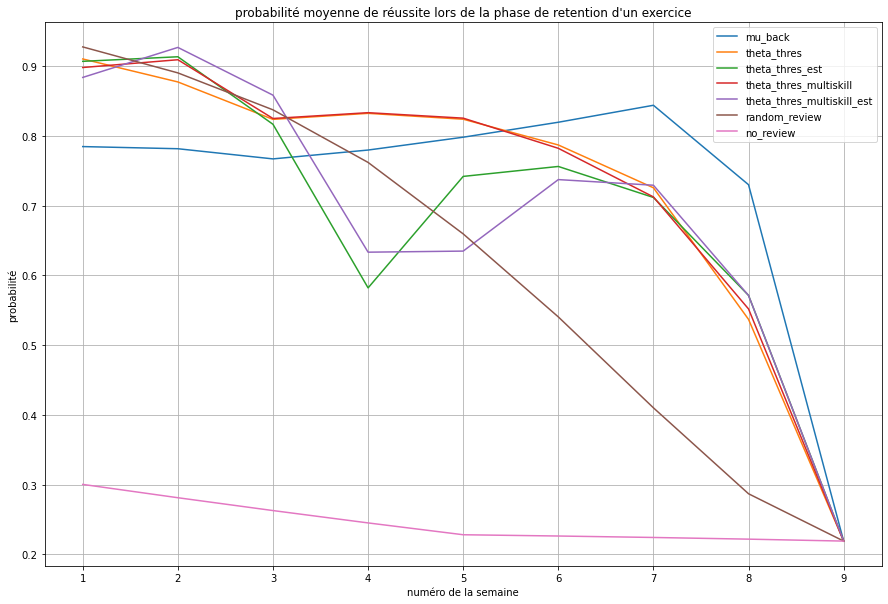

In [9]:
plt.figure(figsize=(15, 10)) 
for strategy in skill_strategies:
    plt.plot(x, evolution_proba_retention[strategy], label = strategy)
plt.xlabel("numéro de la semaine")
plt.ylabel("probabilité")
plt.legend()
plt.title("probabilité moyenne de réussite lors de la phase de retention d'un exercice")
plt.grid()
plt.show()

In [10]:
mean_proba_retention = {}
for strategy in evolution_proba_retention.keys():
    mean_proba_retention[strategy] = evolution_proba_retention[strategy].mean()

mean_proba_retention = {k: v for k, v in sorted(mean_proba_retention.items(), key=lambda item: -item[1])}
mean_proba_retention

{'theta_thres_multiskill': 0.7284898888888889,
 'theta_thres': 0.7262267777777778,
 'mu_back': 0.7248345555555555,
 'theta_thres_est': 0.6910037777777778,
 'theta_thres_multiskill_est': 0.6882057777777777,
 'random_review': 0.6147624444444444,
 'no_review': 0.2452953333333333}

In [11]:
relative_proba_retention = {}
for strategy in evolution_proba_retention.keys():
    relative_proba_retention[strategy] = mean_proba_retention[strategy]/mean_proba_retention['no_review']
relative_proba_retention = {k: v for k, v in sorted(relative_proba_retention.items(), key=lambda item: -item[1])}
relative_proba_retention

{'theta_thres_multiskill': 2.969848137709736,
 'theta_thres': 2.9606220709910684,
 'mu_back': 2.9549463730342294,
 'theta_thres_est': 2.8170278186204567,
 'theta_thres_multiskill_est': 2.805621160523958,
 'random_review': 2.506213371817555,
 'no_review': 1.0}

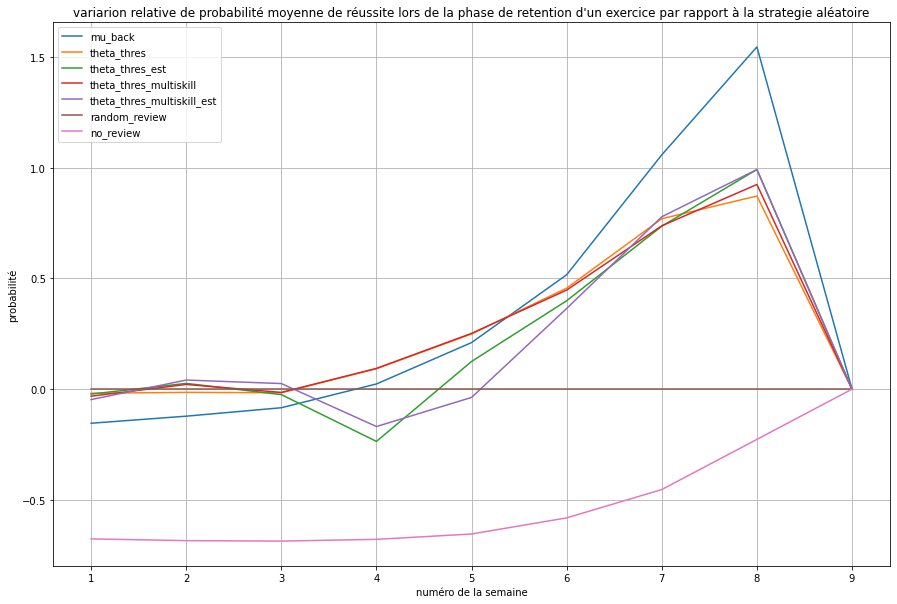

In [12]:

plt.figure(figsize=(15, 10)) 
for strategy in skill_strategies:
    y = []
    for i in range(len(evolution_proba_retention[strategy])):
        y.append((evolution_proba_retention[strategy][i] - evolution_proba_retention['random_review'][i] )/evolution_proba_retention['random_review'][i])
    plt.plot(x, y, label = strategy)
plt.xlabel("numéro de la semaine")
plt.ylabel("probabilité")
plt.legend()
plt.title("variarion relative de probabilité moyenne de réussite lors de la phase de retention d'un exercice par rapport à la strategie aléatoire")
plt.grid()
plt.show()

In [13]:
df[(df.skill_strategy == 'theta_thres_multiskill') & (df.period == 'retention')].drop('run_id', axis = 1).groupby('param').mean().mean(axis = 1)

param
0.0    0.724311
0.1    0.724287
0.2    0.724170
0.3    0.725905
0.4    0.728490
0.5    0.727180
0.6    0.614999
0.7    0.490395
0.8    0.424628
0.9    0.398680
1.0    0.395915
dtype: float64

In [14]:
df[(df.skill_strategy == 'mu_back') & (df.period == 'retention')].drop('run_id', axis = 1).groupby('param').mean().mean(axis = 1)

param
1.0    0.724835
2.0    0.678450
3.0    0.627116
dtype: float64